## Types of ML
1. Supervised ML
2. Unsupervised ML
3. Semi Supervised ML
4. Reinforcement ML


1. SUpervised ML:
    - Classification
    - Regression

2. Unsupervised ML:
    - Clusters or similar groups
    - eg: customer segmentation    

3. Semisupervised ML:
    - SUpervised + Unsupervised

4. Reinforcement Learning:
    - 

### DataSets

1. Training dataset:
    - Train the model


2. Validation Dataset:
    - Hyperparameter tunning

   
3. Testing Dataset:
    - Test the model accuracy

## Handle Missing values


In [1]:
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Check missing values
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
# Check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
## Delete the rows
df.shape

(891, 15)

In [6]:
df.dropna().shape

(182, 15)

In [7]:
## Delete column wise deletion
df.dropna(axis=1)


,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation Missing Values

### 1. Mean Value Imputation 


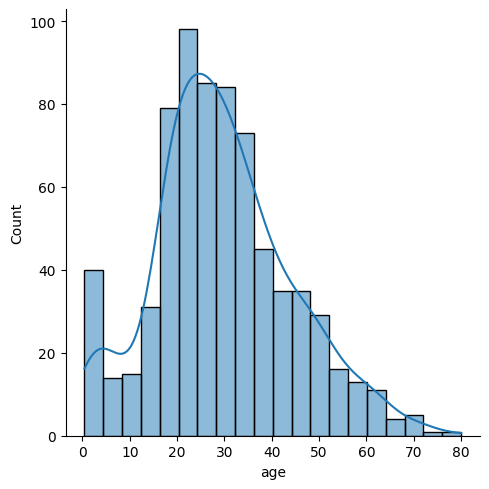

In [9]:
sns.displot(df['age'], kde=True)

In [10]:
df['Age_mean'] = df['age'].fillna(df['age'].mean())

df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [11]:
## Mean imputation works well when we have normally distributed data.



### 2. Median Value Imputation - if we have outliers in the dataset

In [12]:
df['age_median'] = df['age'].fillna(df['age'].median())

df[['age_median','age']]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


### 3. Mode imputation Technique - can be used with Categorical values

In [14]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [15]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [20]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [21]:
df['embarked_mode'] = df['embarked'].fillna(mode_value)

df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


## Handling Imbalanced Dataset
1. Up Sampling
2. Down Sampling

In [22]:
import numpy as np
import pandas as pd

In [23]:
# Creating Daaset
np.random.seed(123)

# Creates Dataframe with 2 classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [24]:
n_class_0,n_class_1

(900, 100)

In [25]:
# Create Dtatframe with Imbalanced Dataset
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [29]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [30]:
## Upsampling
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

In [33]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

In [34]:
df_minority_upsampled.shape

(900, 3)

In [36]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

df_upsampled

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
952,1.188902,2.189189,1
965,3.919526,1.980541,1
976,2.810326,3.604614,1
942,3.621531,2.168229,1


In [37]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [38]:
## DownSampling

## Dataset creation - same as above
import numpy as np
import pandas as pd

# Creating Daaset
np.random.seed(123)

# Creates Dataframe with 2 classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

# Create Dtatframe with Imbalanced Dataset
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [39]:
## Upsampling
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

In [40]:
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [41]:
df_majority_downsampled.shape

(100, 3)

In [42]:
df_downsampled = pd.concat([df_minority,df_majority_downsampled])

In [44]:
df_downsampled['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64

## SMOTE (Synthetic Minority Oversampling Technique)

In [45]:
from sklearn.datasets import make_classification

In [49]:
X, y = make_classification(n_samples=1000, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=12, n_redundant=0)

In [51]:
import pandas as pd

df1 = pd.DataFrame(X, columns=['f1','f2'])
df2 = pd.DataFrame(y, columns=['target'])

final_df = pd.concat([df1, df2], axis=1)
final_df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [52]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

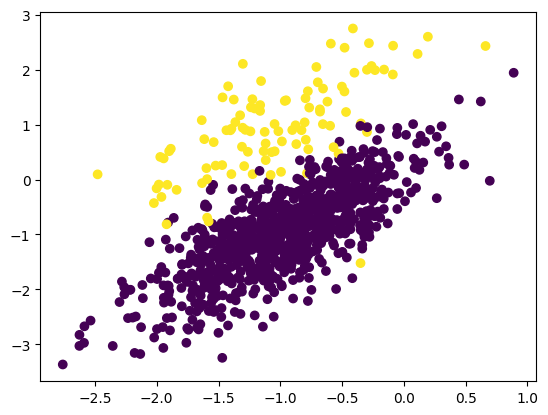

In [53]:
import matplotlib.pyplot as plt

plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [68]:
from imblearn import over_sampling
from imblearn.over_sampling import  SMOTE

In [72]:
# Transform the dataset
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['f1','f2']], final_df['target'])

In [70]:
X.shape

(1800, 2)

In [71]:
y.shape

(1800,)

In [73]:
len(y[y==0])

900

In [74]:
len(y[y==1])

900

In [76]:
df1 = pd.DataFrame(X, columns=['f1','f2'])
df2 = pd.DataFrame(y, columns=['target'])

oversample_df = pd.concat([df1, df2], axis=1)

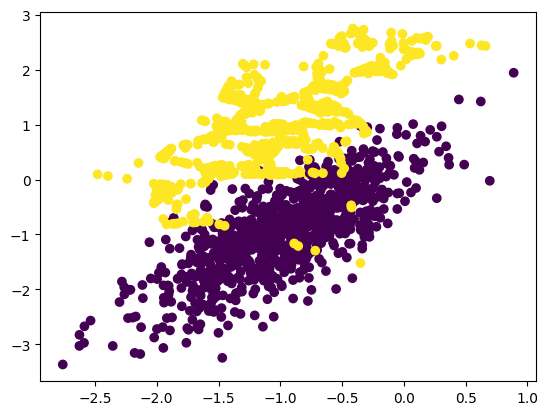

In [78]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c=oversample_df['target'])

## Data Interpolation
1. Linear Interpolation
2. Cubic Interpolation with Scipy
3. Polynomial Interpolation


In [79]:
import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])

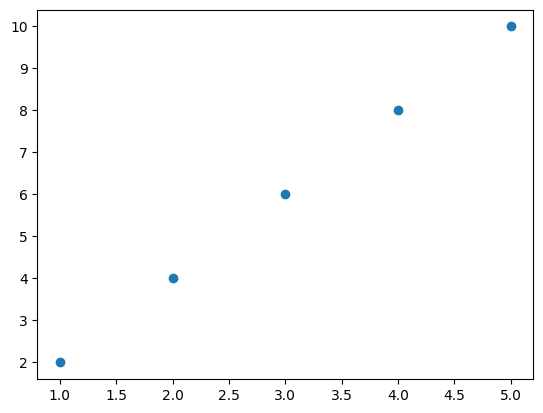

In [80]:
import matplotlib.pyplot as plt

plt.scatter(x,y)

In [81]:
# Interpolate data using linear interpolation
x_new = np.linspace(1,5,10)
y_interp = np.interp(x_new,x,y)

In [82]:
y_interp

array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
        6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ])

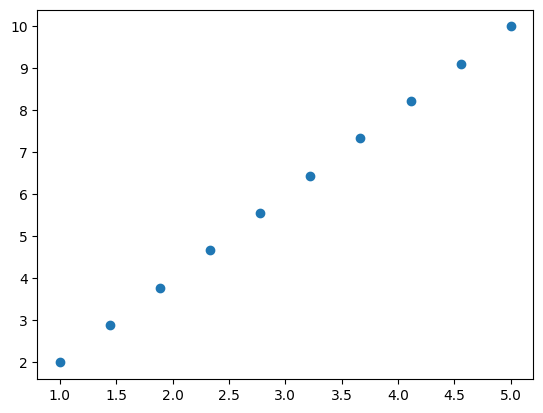

In [83]:
plt.scatter(x_new,y_interp)

### Cubic Interpolation

In [85]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125])

In [87]:
from scipy.interpolate import interp1d

## Create a cubic interpolation function
f = interp1d(x,y, kind='cubic')

In [88]:
x_new = np.linspace(1,5,10)
y_interp = f(x_new)
y_interp

array([  1.        ,   3.01371742,   6.739369  ,  12.7037037 ,
        21.43347051,  33.45541838,  49.2962963 ,  69.48285322,
        94.54183813, 125.        ])

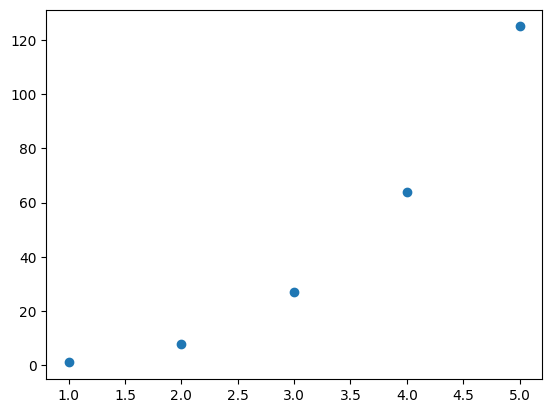

In [90]:
plt.scatter(x,y)

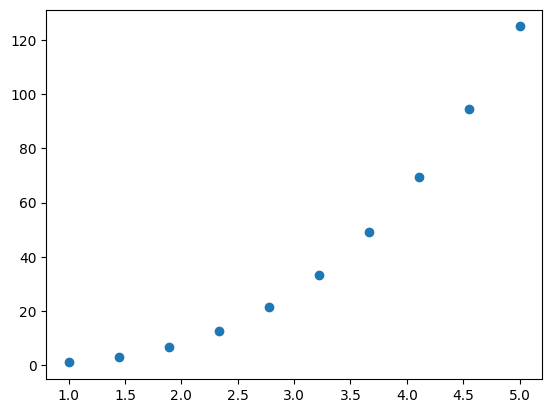

In [91]:
plt.scatter(x_new,y_interp)

### 3. Polynomial Interpolation

In [92]:
import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([1,4,9,16,25])

In [93]:
p = np.polyfit(x,y,2)

In [94]:
x_new = np.linspace(1,5,10)
y_interp = np.polyval(p, x_new)
y_interp

array([ 1.        ,  2.08641975,  3.56790123,  5.44444444,  7.71604938,
       10.38271605, 13.44444444, 16.90123457, 20.75308642, 25.        ])

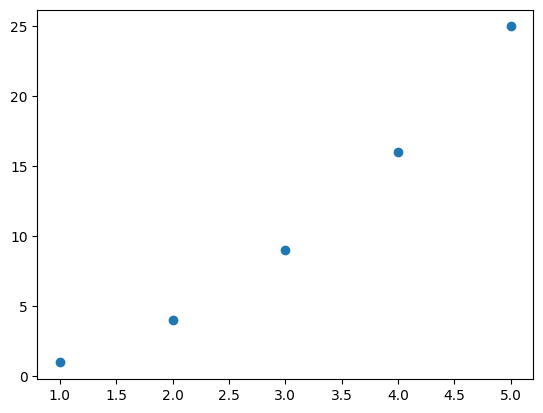

In [95]:
plt.scatter(x,y)

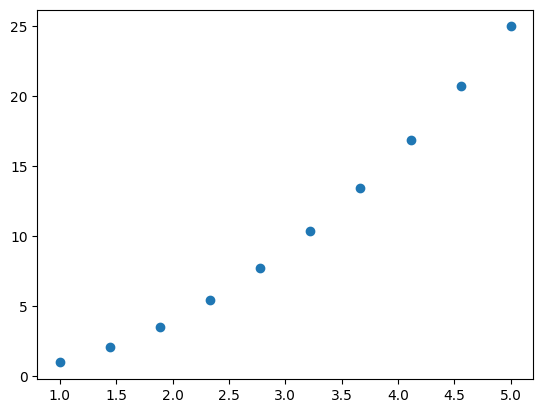

In [96]:
plt.scatter(x_new,y_interp)

## Percentiles and Quartiles:
- 

## 5 Number Summary and Boxplot (useful while finding outliers)
1. Minimum
2. First Quartile (25 percentile) Q1
3. Median
4. Third Quartile (75 percentile) Q3
5. Maximum

In [98]:
# Removing a outliers
import numpy as np

lst_marks = [45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum, Q1, median, Q3, maximum = np.quantile(lst_marks,[0.0,0.25,0.50,0.75,1.0])

In [102]:
minimum, Q1, median, Q3, maximum

(32.0, 54.0, 67.0, 89.0, 99.0)

In [103]:
IQR = Q3 - Q1
IQR

35.0

In [104]:
lower_fence = Q1 - 1.5 * (IQR)

higher_fence  = Q3 + 1.5 * (IQR)

lower_fence, higher_fence

(1.5, 141.5)

<Axes: >

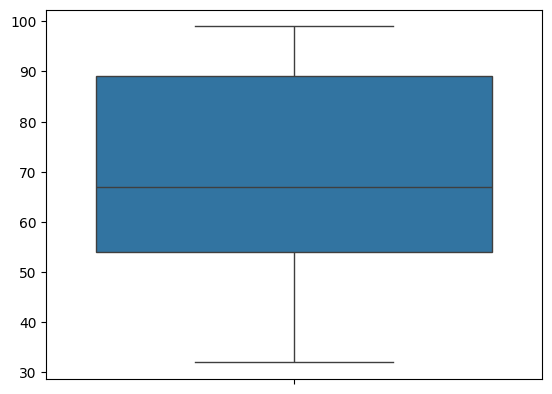

In [105]:
import seaborn as sns

sns.boxplot(lst_marks)

In [110]:
# Adding outliwers

lst_marks = [-10, -20, 45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74, 150, 170, 180]

<Axes: >

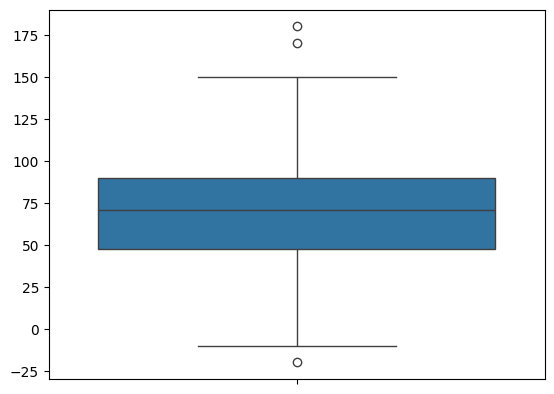

In [111]:
sns.boxplot(lst_marks)

## Feature Extraction
- process of extracting the most important features from the raw data.

### Types:
1. Feature Scaling
- Standardization (Z- Score)
- Normanization (Min Max Scaler)
- Unit vector (Magnitude of 1)


2. Feature Selection: We just pick the most important feature.
- Filter Method:
- Embedded Method:
- Wrapper Method: 

3. PCA (Principal Component Analysis)


1. Feature Scaling
- Standardization (Z- Score)
- Normanization (Min Max Scaler)
- Unit vector (Magnitude of 1)


In [2]:
import seaborn as sns

In [3]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
import numpy as np

mean = np.mean(df['total_bill'])
std = np.std(df['total_bill'])
print(mean,std)

19.78594262295082 8.884150577771132


In [5]:
normalized_data = []
for i in list(df['total_bill']):
    z_score = (i - mean) / std
    normalized_data.append(z_score)
    
normalized_data

[-0.3147113050904943,
 -1.0632353132988692,
 0.13777989987156145,
 0.43831510316725475,
 0.540744704290506,
 0.6195367051545455,
 -1.2399545152367863,
 0.7985071071171495,
 -0.5342033074974614,
 -0.5634689078183903,
 -1.0711145133852733,
 1.7417599174609364,
 -0.49143050702841123,
 -0.15262490331304146,
 -0.557840907756673,
 0.2019391005751361,
 -1.0643609133112126,
 -0.3935033059545337,
 -0.31696250511518104,
 0.09725829942719795,
 -0.2100305039425557,
 0.05673669898283484,
 -0.45203450659639155,
 2.2100095225958003,
 0.003833498402694168,
 -0.2224121040783337,
 -0.7221785095588127,
 -0.7987193103981653,
 0.21544630072325727,
 -0.015301701807144186,
 -1.1521577142739994,
 -0.16162970341178864,
 -0.5319521074727743,
 0.10176069947657193,
 -0.22578890411536368,
 0.4810879036363046,
 -0.3912521059298469,
 -0.32146490516455467,
 -0.12335930299211233,
 1.2926455125359115,
 -0.4216433062631192,
 -0.2618081045103532,
 -0.6580193088552376,
 -1.137524914113535,
 1.1947183114620337,
 -0.1683833

<Axes: xlabel='total_bill', ylabel='Count'>

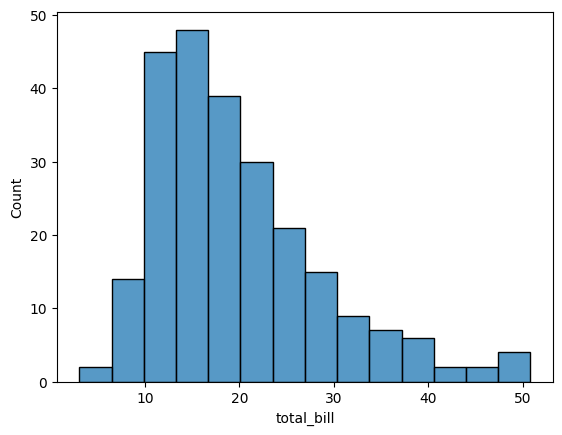

In [6]:
sns.histplot(df["total_bill"])

<Axes: ylabel='Count'>

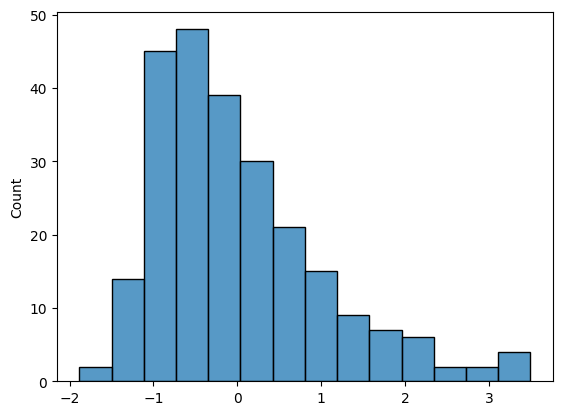

In [7]:
sns.histplot(normalized_data)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler

StandardScaler()

In [11]:
scaler.fit(df[["total_bill"]])

StandardScaler()

In [12]:
scaler.transform(df[["total_bill"]])

array([[-3.14711305e-01],
       [-1.06323531e+00],
       [ 1.37779900e-01],
       [ 4.38315103e-01],
       [ 5.40744704e-01],
       [ 6.19536705e-01],
       [-1.23995452e+00],
       [ 7.98507107e-01],
       [-5.34203307e-01],
       [-5.63468908e-01],
       [-1.07111451e+00],
       [ 1.74175992e+00],
       [-4.91430507e-01],
       [-1.52624903e-01],
       [-5.57840908e-01],
       [ 2.01939101e-01],
       [-1.06436091e+00],
       [-3.93503306e-01],
       [-3.16962505e-01],
       [ 9.72582994e-02],
       [-2.10030504e-01],
       [ 5.67366990e-02],
       [-4.52034507e-01],
       [ 2.21000952e+00],
       [ 3.83349840e-03],
       [-2.22412104e-01],
       [-7.22178510e-01],
       [-7.98719310e-01],
       [ 2.15446301e-01],
       [-1.53017018e-02],
       [-1.15215771e+00],
       [-1.61629703e-01],
       [-5.31952107e-01],
       [ 1.01760699e-01],
       [-2.25788904e-01],
       [ 4.81087904e-01],
       [-3.91252106e-01],
       [-3.21464905e-01],
       [-1.2

In [13]:
import pandas as pd

pd.DataFrame(scaler.fit_transform(df[["total_bill", "tip"]]), columns=["total_bill","tip"])

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


### Normalization - Min Max Scaler

In [14]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
min_max = MinMaxScaler()

In [17]:
min_max.fit_transform(df[["distance", "fare", "tip"]])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [18]:
min_max.transform([[1.60,7.0,2.15]])

c:\Users\prashant.shinde\Documents\Projects\pw-datascience\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.04359673, 0.04026846, 0.06475904]])

### Unit Vector

In [19]:
from sklearn.preprocessing import normalize

In [20]:
normalize(df[["distance", "fare", "tip"]])

array([[0.21346145, 0.93389384, 0.28683882],
       [0.15606402, 0.98774694, 0.        ],
       [0.1716575 , 0.93973084, 0.29570197],
       ...,
       [0.25050016, 0.96811656, 0.        ],
       [0.18349711, 0.98302025, 0.        ],
       [0.2429556 , 0.94658025, 0.21203398]])

## Data Encoding
1. Nominal/OHE Encoding
2. Label and Ordinal Encoding
3. Target Guided Ordinal Encoding

---
1. Nominal Encoding or One Hot Encoding 
- should not be used when we have more categories
- sparse matrix - overfitting problem.

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Create a dataframe
df = pd.DataFrame({"color": ['red', 'blue', 'green', 'green', 'red', 'blue']})
df

,color
0,red
1,blue
2,green
3,green
4,red
5,blue


In [4]:
# Create and instance  OnehotEncoder
encoder = OneHotEncoder()

In [7]:
## PErform fit and transform
encoded = encoder.fit_transform(df[["color"]]).toarray()


In [8]:
encoded_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
encoded_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [11]:
# For new data
encoder.transform([['blue']]).toarray()

c:\Users\prashant.shinde\Documents\Projects\pw-datascience\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [12]:
pd.concat([df, encoded_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


In [13]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
# Convert All categorical to encoded values like sex, smoker, day, time columns

encoded_sex = encoder.fit_transform(df[["sex"]]).toarray()
encoded_df_sex = pd.DataFrame(encoded_sex,columns=encoder.get_feature_names_out())
#encoded_sex

encoded_smoker = encoder.fit_transform(df[["smoker"]]).toarray()
encoded_df_smoker = pd.DataFrame(encoded_smoker,columns=encoder.get_feature_names_out())

encoded_day = encoder.fit_transform(df[["day"]]).toarray()
encoded_df_day = pd.DataFrame(encoded_day,columns=encoder.get_feature_names_out())

encoded_time = encoder.fit_transform(df[["day"]]).toarray()
encoded_df_time  = pd.DataFrame(encoded_time,columns=encoder.get_feature_names_out())

In [24]:
# Form a new DataFrame
df = pd.concat([df, encoded_df_sex], axis=1)
df = pd.concat([df, encoded_df_day], axis=1)
df = pd.concat([df, encoded_df_smoker], axis=1)
df = pd.concat([df, encoded_df_time], axis=1)
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male,sex_Female,...,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,Female,No,Sun,Dinner,2,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
